In [ ]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

In [109]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib  as plt
import matplotlib.pyplot as pt
from scipy import stats
print(f"matplotlib version:{plt.__version__}")
print(f"numpy version:{np.__version__}")
print(f"pandas version:{pd.__version__}")
print(f"scipy version:{sci.__version__}")
print(f"seaborn version:{sns.__version__}")

matplotlib version:3.6.0
numpy version:1.24.0
pandas version:1.5.0
scipy version:1.10.0
seaborn version:0.12.0


#### Exercise 1 (Reading and processing data).
a) Read the data from the file smoking.csv, and divide the dataset into two groups con- sisting of smokers and non-smokers. Write a script which computes the average lung function, measured in FEV1, among the smokers and among the non-smokers.

In [110]:
df  = pd.read_csv('smoking.csv',sep="\t",header=None,names=['age', 'FEV1','height','gender','smoking_status','weight'])

In [111]:
names=['age', 'FEV1','height','gender','smoking_status','weight']

In [112]:
df

,age,FEV1,height,gender,smoking_status,weight
0,9,1.708,57.0,0,0,9.540109
1,8,1.724,67.5,0,0,11.110110
2,7,1.720,54.5,0,0,9.513850
3,9,1.558,53.0,1,0,11.455923
4,9,1.895,57.0,1,0,10.297130
...,...,...,...,...,...,...
649,16,4.270,67.0,1,1,9.595947
650,15,3.727,68.0,1,1,8.530756
651,18,2.853,60.0,0,0,11.251590
652,16,2.795,63.0,0,1,9.037336


b) Report your computed average FEV1 scores. Are you surprised?

Forced expiratory volume in one second (FEV1) comparison between nonsmokers and smokers
Overall, the average FEV1 indicates that the smokeing group has larger lung capacity than the non-smoking group. 
At the beginning, I thought that people who smoked probably had a smaller lung capacity because smoking can damage airways and small airsacs in lungs. However, from the comparative data it was found that smokers had higher lung capacity than non-smokers. 

In [113]:
agg_func_math = {'FEV1':[ 'mean', 'median', 'min', 'max', 'std','count']}
df.groupby(['smoking_status']).agg(agg_func_math).round(3)

FEV1                                  
                 mean median    min    max    std count
smoking_status                                         
0               2.566  2.465  0.791  5.793  0.851   589
1               3.277  3.169  1.694  4.872  0.750    65

In [114]:
agg_func_math = {'age':[ 'mean', 'median', 'min', 'max', 'std','count']}
df.groupby(['smoking_status']).agg(agg_func_math).round(3)

age                            
                  mean median min max    std count
smoking_status                                    
0                9.535    9.0   3  19  2.741   589
1               13.523   13.0   9  19  2.339    65

#### Exercise 2 (Boxplots). 
Make a box plot of the FEV1 in the two groups. What do you see? Are you surprised?

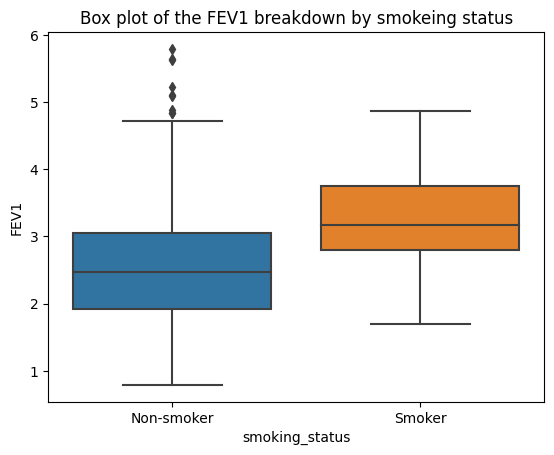

In [115]:
sns.boxplot(data=df, x="smoking_status", y="FEV1").set(title='Box plot of the FEV1 breakdown by smokeing status')
labels=["Non-smoker","Smoker"]
pt.xticks([0,1],["Non-smoker", "Smoker"])
pt.show()

The boxplot above illustrates a comparison of forced expiratory volume in one second (FEV1) between none-smoker and smoker. This FEV1 measure will be used as an indicator of lung function in this assignment. Surprisingly, the smoker group was reported larger average value of FEV1 than the non-smoking group. When examining deatils of the chart, non-smoking group has higher spreading of FEV1 than the smoking group. There are some outlier at the top end. I think we need ferther analysis before drawing a conclusion. 

#### Exercise 3 (Hypothesis testing). 
Next, we will perform a hypothesis test to investigate the
difference between the FEV1 level in the two populations smokers and non-smokers.
a) Write a script that performs a two-sided t-test whose null hypothesis is that the two populations have the same mean. Use a significance level of α = 0.05, and return a binary response indicating acceptance or rejection of the null hypothesis. You should try do implement it by yourself – though not the CDF of the t-distribution, use scipy’s stats.t.cdf. If you can’t, you may use scipy’s stats.ttest ind.
b) Report your result and discuss it. Are you surprised?

**T-test**. The main idea of comparing means is to take the difference in the means and see how many standard errors of the difference in means ($SE_{(\bar{Y_1}-\bar{Y_2})}$) this difference is away from zero.

$H_0^*$ : There is  no difference on FEV1 level between smoker and non-smoker. \
$H_A^*$ : There is some effect on FEV1 level. 


The formula for the **t-statistic** is:
$$t_s = \dfrac{(\bar{y_1}-\bar{y_2})-0}{SE_{(\bar{Y_1}-\bar{Y_2})}}$$

In [116]:
df["smoking_status"].value_counts()

0    589
1     65
Name: smoking_status, dtype: int64

In [117]:
df0 = df[df['smoking_status'] == 0]
df1 = df[df['smoking_status'] == 1]

In [118]:
df1['FEV1'].std()

0.7499863098109498

In [119]:
df1['FEV1'].std()

0.7499863098109498

In [120]:
n1 = df0['FEV1'].count() #number of FEV1 in group 1
n2 = df1['FEV1'].count() #number of FEV1 in group 2
y_bar1 = df0['FEV1'].mean()  #mean of group 1
y_bar2 = df1['FEV1'].mean() #mean of group 2
s1 = df0['FEV1'].std() #standard deviation of group 1
s2 = df1['FEV1'].std() #standard deviation of group 2
SE_1 = s1/np.sqrt(n1) #standard error of the mean for group 1
SE_2 = s2/np.sqrt(n2) #standard error of the mean for group 2
#question: what was the formula for the standard error of the mean again?

#calculate the t statistic
diff_y = y_bar1-y_bar2
SE_diff = np.sqrt((s1**2)/n1 + (s2**2)/n2)
#or
SE_diff2 = np.sqrt(SE_1**2 + SE_2**2) 
t_s = (diff_y-0)/SE_diff

print("The SE of the differene is: ", str(SE_diff), " and the t statistic is: ", str(t_s))

The SE of the differene is:  0.09940669628138687  and the t statistic is:  -7.149608129503808


In [121]:
#Given our t-statistic, Find the p-value. 
SE1 = s1/np.sqrt(n1)
SE2 = s2/np.sqrt(n2)
degree_of_freedom = (SE1**2 + SE2**2)**2/(SE1**4/(n1-1)+SE2**4/(n2-1))
degree_of_freedom

83.27311025102057

In [126]:
#The t-statistic together with the df can be used to find a p-value
p = stats.t.sf(np.abs(t_s), degree_of_freedom)
p = p*2
print(f"P-value is at {p:.20f}")

P-value is at 0.00000000030738127449


### Alpha ($\alpha$)
We have now calculated a p-value. The significant level is set before we do the study and is called $\alpha$.  we use an $\alpha$ value of 5%. This means that if our p-value is below this 5% value, we conclude there is enough evidence to reject null hypothesis. 
### Confidence intervals
We have calculated a p-value and we have concluded that based on an $\alpha$  of 5%, there is enough evidence to reject the null hypothesis. We can also calculate a confidence interval for the difference in means. 

A 95% confidence interval for the difference in means that does not contain zero, is the same as a t test that reject $H_0$ with an alpha of 5%.


In [139]:
#With the previous information, we can calculate a 95% confidence interval
#find the critical t
alpha = 0.05 #we set our confidence interval.
t_025 = abs(stats.t.ppf(alpha/2, degree_of_freedom)) 
diff_y_lower = diff_y - t_025*SE_diff
diff_y_upper = diff_y + t_025*SE_diff
print("The 95% confidence interval is (", str(diff_y_lower), ", ", str(diff_y_upper), ")")

The 95% confidence interval is ( -0.9084252552458381 ,  -0.5130125924752011 )


We have calculated a p-value 0.0000 and we have concluded that based on alpha of 0.05, there is suffient evidence to reject the null hypothesis and accept the alternative hypothesis. This means there is a difference in the level of FEV1 between smoker and non-smoker

#### Exercise 4 (Correlation).
a) Compute the correlation between age and FEV1. Make a scatter plot of age versus
FEV1 where non-smokers appear in one color and smokers appear in another.



With an attemp to answer the question, how is the age correlated to FEV1, I will apply linear regression model to explain a relationship between the age and FEV1

The linear regression model can be stated as:
$$Y = \beta_0+\beta_1 X+\varepsilon\mbox{, where }\varepsilon\sim\mathcal{N}(0,\sigma_\varepsilon)$$

- $b_0$ is an estimate of $\beta_0$
- $b_1$ is an estimate of $\beta_1$
- $s_e$ is an estimate of $\sigma_\varepsilon$

Thus we describe our observations as:
$$y_i = b_0+b_1x_i+e_i,$$
where the residuals $e_i$ should have the same (normal) distribution along $X$.

To find  relationship between age and FEV1 
start by computing the correlation coefficient $r$ step by step.
First thing to do is to "normalize" each of the variables as
$$z_x=\dfrac{x-\overline{x}}{s_x},\,z_y=\dfrac{y-\overline{y}}{s_y}$$
These scores indicate how many standard deviations away from the mean each measurement is:


In [129]:
df['z_age'] = (df.age-np.mean(df.age))/np.std(df.age,ddof=1)
df['z_FEV1'] = (df.FEV1-np.mean(df.FEV1))/np.std(df.FEV1,ddof=1)

In [130]:
df['z_prod']   = df.z_age*df.z_FEV1
df

,age,FEV1,height,gender,smoking_status,weight,z_age,z_FEV1,z_prod
0,9,1.708,57.0,0,0,9.540109,-0.315238,-1.071184,0.337678
1,8,1.724,67.5,0,0,11.110110,-0.653769,-1.052731,0.688243
2,7,1.720,54.5,0,0,9.513850,-0.992301,-1.057344,1.049204
3,9,1.558,53.0,1,0,11.455923,-0.315238,-1.244183,0.392214
4,9,1.895,57.0,1,0,10.297130,-0.315238,-0.855512,0.269690
...,...,...,...,...,...,...,...,...,...
649,16,4.270,67.0,1,1,9.595947,2.054482,1.883632,3.869888
650,15,3.727,68.0,1,1,8.530756,1.715951,1.257377,2.157597
651,18,2.853,60.0,0,0,11.251590,2.731545,0.249372,0.681171
652,16,2.795,63.0,0,1,9.037336,2.054482,0.182479,0.374900


The correlation coefficient (r) is found as an "average" of these scores, through the formula:
$$r=\dfrac{\sum_{i=1}^{n}{(z_{x_i}\times z_{y_i})}}{n-1}=\dfrac{1}{n-1}\sum_{i=1}^{n}{\left(\frac{x_i-\overline{x}}{s_x}\right)\times\left(\frac{y_i-\overline{y}}{s_y}\right)}$$

In [131]:
r  = np.sum(df.z_prod)/(len(df.z_prod)-1)
r

0.7564589899895998

The correlation coefficient between the age and the FEV1 is at  𝑟 = 0.756, which indicates strong positive correlation between these variables.

#### Test for correlation significance
$r$ is an estimate for $\rho$, the population correlation coefficient. We can make a $t$ test for the null hypothesis $H_0:\rho=0$, with $t_s=r\sqrt{\dfrac{n-2}{1-r^2}}$ and $df=n-2$.


$H_0:$ The age and FEV1 are not correlated in the population ($\rho=0$).

$H_A:$ There is a correlation ($\rho\neq0$) in the age and FEV1 measurement.

In this test, alpha or the significant level is at 0.05

1.) The correlation coefficient  $r = 0.756$ and $n = 654$:

In [132]:
n = 654
t_s  = r*np.sqrt((n - 2)/(1 - r**2))
dof  = n - 2 # We are already using df for the data frame
t_s, dof

(29.5327662402651, 652)

In [133]:
P = 2*(stats.t.sf(t_s,dof))
print(f"P_value = {P:.12f}")

P_value = 0.000000000000


The p-value 0.000 and based on alpha of 0.05, there is suffient evidence to reject  𝐻0:
  ( 𝜌=0
 ), which means there is a correlation between the age and FEV1.

To compute the slope ($b_1$) and intercept ($b_0$) of the fitted regression line, as:
$$b_1=r\times\dfrac{s_y}{s_x}$$ $$\,b_0=\overline{y}-b_1\overline{x}$$

In [134]:
b1 = r*np.std(df.FEV1,ddof=1)/np.std(df.age,ddof=1)
b0 = np.mean(df.FEV1) - b1*np.mean(df.age)
b0, b1

(0.4316481057333976, 0.22204097595848468)

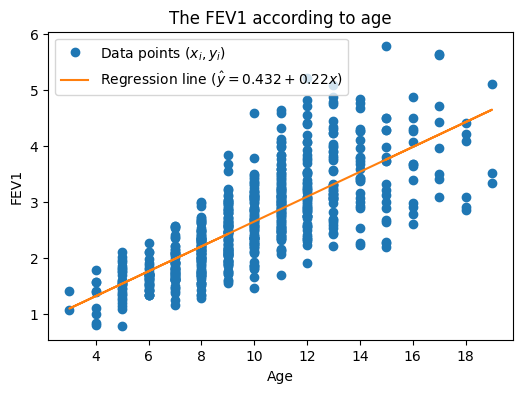

In [135]:
fig, ax = pt.subplots(figsize=(6,4))
ax.plot(df.age,df.FEV1,'o',label='Data points $(x_i,y_i)$') # Data points
ax.plot(df.age,b0+b1*df.age,'-',label='Regression line ($\hat{y}=0.432 + 0.22x$)') # Regression line
ax.set_title('The FEV1 according to age')
ax.set_xlabel('Age')
ax.set_ylabel('FEV1')
ax.legend()
pt.show()

Text(0, 0.5, 'FEV1')

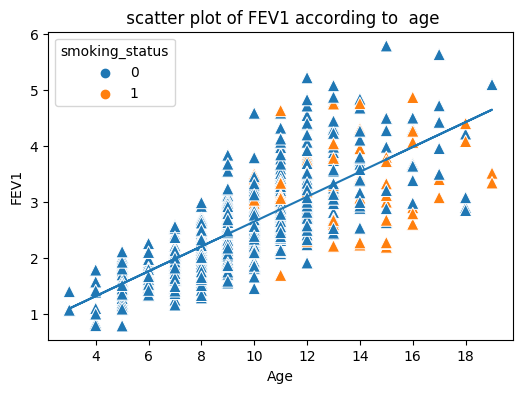

In [136]:
fig, ax = pt.subplots(figsize=(6,4))
sns.scatterplot(data=df, x="age", y="FEV1", hue="smoking_status",marker='^',s=80)
ax.set_title(' scatter plot of FEV1 according to  age')
ax.plot(df.age,b0+b1*df.age,'-',label='Regression line ($\hat{y}=b_0+b_1x$)') # Regression line
ax.set_xlabel('Age')
ax.set_ylabel('FEV1')

b) What do you see? Comment your results.
The scatter plot above represents a strong positive relationship between FEV1 and age, which means that the older we get, the more FEV1 measurements we have. So we should include age as one of the parameters in this study. The plot is divided between nonsmokers (smoking status = 0) in blue markers and smokers (smoking status = 1) in orange markers. The younger age group, ranging from 3 to 9 years for nonsmokers, contributed to the lower end of FEV1, whereas the smoking group was older than 9 years. To make it more comparable, we should compare fully grown lung groups or exclude the younger group from this comparison.

#### Exercise 5 (Histograms).
a) Create a histogram over the age of subjects in each of the two groups, smokers and non-smokers.

Text(0.5, 1.0, 'Frequency distribution of age by smoking status')

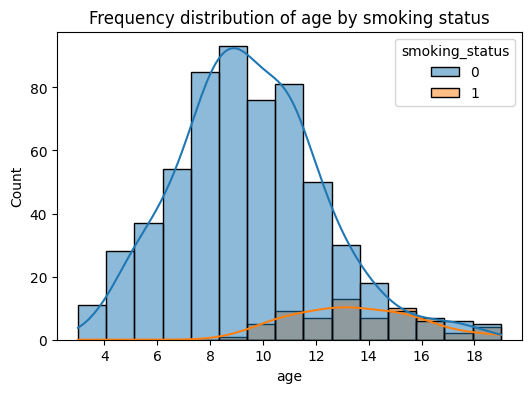

In [137]:
fig, ax = pt.subplots(figsize=(6,4))
sns.histplot(data=df, x="age",hue='smoking_status',kde=True,bins=15)
ax.set_title('Frequency distribution of age by smoking status')

b) What do you see? Does this explain your results on lung function in the two groups?
Deliverables. The two histograms, and a couple of lines of discussion.

The histogram above shows the frequency distribution of two datasets: nonsmokers (in blue) and smokers (in orange) in each interval. The majority of data is collected between the ages of eight and nine. The nonsmoking group has a wider age range, whereas the smoking group has no younger age range (from 3 to 9). According to the frequency counts by age, we can see that the nonsmoking group has very high counts for younger ages; the younger age group has lower FEV1 measurements, resulting in a lower average FEV1 than the other group on the first comparison. I believe that a young age group should be excluded from this study. 

In [138]:
from scipy.stats import t
p=2*t.cdf(-7.149608129503808,83.27311025102057)

In [ ]:
### hide here
k= [1, 3, 5, 7, 9, 11]
score_k = []    
cv = KFold(n_splits=5)

for train, test in cv.split(XTrain):
    XTrainCV,XTestCV,YTrainCV,YTestCV = XTrain[train],XTrain[test],YTrain[train],YTrain[test]
     #training
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(XTrainCV,YTrainCV)
    total_score= 0
    
    ac = accuracy_score(YTestCV, knn.predict(XTestCV)) #calculate accuracy score
    #print(ac)
    total_score = 1-ac  #0-1 loss (classification error)
    #average = total_score/5
    #print(average)
    score_k.append((i,total_score))       
    
    
    score_k